Learned weights:
 [[1.44914079]
 [6.78386509]
 [4.90830166]]


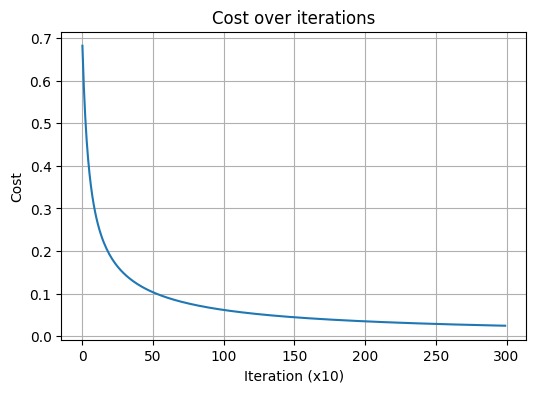

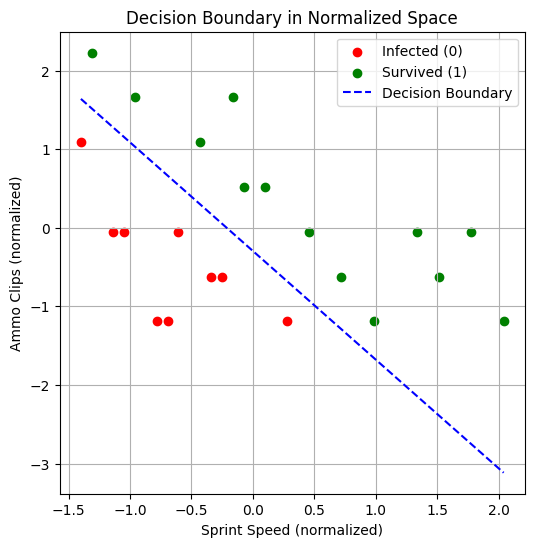


=== TEST PREDICTION ===
Runner: 25 km/h, 1 Ammo Clip
Survival Probability: 0.9998
Prediction: SURVIVES (1)


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import csv

filename = "/content/zombies_data - Sheet1.csv"

speeds = []
ammos = []
labels = []

with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        speeds.append(float(row["SprintSpeed"]))
        ammos.append(float(row["AmmoClips"]))
        labels.append(int(row["Result"]))

X = np.column_stack((speeds, ammos))
y = np.array(labels).reshape(-1, 1)

def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_norm, mean, std = normalize(X)

Xb = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])  # (m × 3)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w):
    m = len(y)
    h = sigmoid(X @ w)
    eps = 1e-9
    return -(1/m) * np.sum(y*np.log(h+eps) + (1-y)*np.log(1-h+eps))

def gradient_descent(X, y, lr=0.1, epochs=3000):
    m, n = X.shape
    w = np.zeros((n, 1))
    costs = []

    for i in range(epochs):
        h = sigmoid(X @ w)
        grad = (1/m) * (X.T @ (h - y))
        w -= lr * grad

        if i % 10 == 0:
            costs.append(compute_cost(X, y, w))

    return w, costs

w, costs = gradient_descent(Xb, y, lr=0.1, epochs=3000)

print("Learned weights:\n", w)

plt.figure(figsize=(6,4))
plt.plot(costs)
plt.title("Cost over iterations")
plt.xlabel("Iteration (x10)")
plt.ylabel("Cost")
plt.grid()
plt.show()

plt.figure(figsize=(6,6))

infected = y.flatten() == 0
survived = y.flatten() == 1

plt.scatter(X_norm[infected,0], X_norm[infected,1], color='red', label='Infected (0)')
plt.scatter(X_norm[survived,0], X_norm[survived,1], color='green', label='Survived (1)')

x_vals = np.linspace(min(X_norm[:,0]), max(X_norm[:,0]), 100)
y_vals = -(w[0] + w[1]*x_vals) / w[2]

plt.plot(x_vals, y_vals, 'b--', label='Decision Boundary')
plt.xlabel("Sprint Speed (normalized)")
plt.ylabel("Ammo Clips (normalized)")
plt.legend()
plt.title("Decision Boundary in Normalized Space")
plt.grid()
plt.show()
runner = np.array([[25, 1]])
runner_norm = (runner - mean) / std
runner_norm = np.hstack([np.ones((1,1)), runner_norm])

prob = sigmoid(runner_norm @ w)[0][0]

print("\n=== TEST PREDICTION ===")
print("Runner: 25 km/h, 1 Ammo Clip")
print(f"Survival Probability: {prob:.4f}")
print("Prediction:", "SURVIVES (1)" if prob >= 0.5 else "INFECTED (0)")
